In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb

In [2]:
# Importing the dataset. The Dataset is used from the Australian Labour Market Information Portal
data = pd.read_excel('https://lmip.gov.au/PortalFile.axd?FieldID=3195463&.xlsx', sheet_name='SA4 Regions',header=0)

In [3]:
# Renaming the columns
mapping = {data.columns[0]:'region', data.columns[1]:'state_territory', data.columns[2]:'date', data.columns[3]:'unemployment_rate', data.columns[4]:'participation_rate', data.columns[5]:'employment_rate'}
data = data.rename(columns=mapping)
data.head(5)

,region,state_territory,date,unemployment_rate,participation_rate,employment_rate
0,Adelaide North,SA,2006-11-01,5.9,61.5,69.2
1,Adelaide North,SA,2006-12-01,6.0,61.7,69.2
2,Adelaide North,SA,2007-01-01,6.2,61.8,69.2
3,Adelaide North,SA,2007-02-01,6.2,61.8,69.2
4,Adelaide North,SA,2007-03-01,6.2,61.7,69.1


In [4]:
# Identifying the datatypes of the columns
data.dtypes

region                        object
state_territory               object
date                  datetime64[ns]
unemployment_rate            float64
participation_rate           float64
employment_rate              float64
dtype: object

In [6]:
# Some insights of the data
data.describe()

,unemployment_rate,participation_rate,employment_rate
count,8145.000000,8145.000000,8145.000000
mean,5.450816,64.280749,72.309945
std,1.399403,4.860442,3.748080
min,1.700000,45.100000,57.700000
25%,4.400000,61.200000,69.700000
50%,5.400000,64.700000,72.600000
75%,6.400000,67.400000,75.000000
max,11.600000,79.600000,82.200000


In [7]:
# Identifying the dimensions
data.shape

(8145, 6)

In [8]:
# Checking for the null values
data.isnull().sum().any()

False

In [9]:
# Changing the format of Date
data['date'] = data['date'].dt.strftime('%B %Y')

In [10]:
# Checking the changes
data.head(5)

,region,state_territory,date,unemployment_rate,participation_rate,employment_rate
0,Adelaide North,SA,November 2006,5.9,61.5,69.2
1,Adelaide North,SA,December 2006,6.0,61.7,69.2
2,Adelaide North,SA,January 2007,6.2,61.8,69.2
3,Adelaide North,SA,February 2007,6.2,61.8,69.2
4,Adelaide North,SA,March 2007,6.2,61.7,69.1


In [11]:
# Seperating the data for analysis
data_nsw = data[data.state_territory.eq('NSW')] 
data_vic = data[data.state_territory.eq('VIC')]
data_wa = data[data.state_territory.eq('WA')] 
data_sa = data[data.state_territory.eq('SA')]
data_nt = data[data.state_territory.eq('NT')]
data_tas = data[data.state_territory.eq('TAS')] 
data_qld = data[data.state_territory.eq('QLD')] 
data_act = data[data.state_territory.eq('NSW/ACT')]

In [12]:
data_nsw.shape

(1991, 6)

In [13]:
data_act.shape

(181, 6)

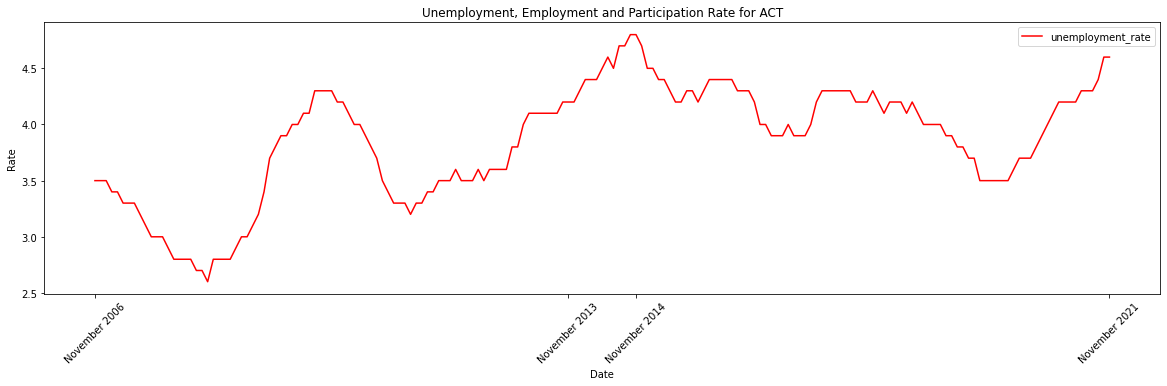

In [14]:
# Plotting the Date VS Rate for ACT
plt.figure(figsize=(20,5))
x_ticks = ['November 2006' ,'November 2013','November 2014','November 2021']
x_labels =['November 2006' ,'November 2013','November 2014','November 2021']
plt.title('Unemployment, Employment and Participation Rate for ACT')
plt.plot(data_act['date'], data_act['unemployment_rate'], 'r', label='unemployment_rate',)
plt.xlabel('Date')
plt.ylabel('Rate')
leg = plt.legend();
plt.xticks(ticks=x_ticks, labels=x_labels,rotation=45)
plt.show()

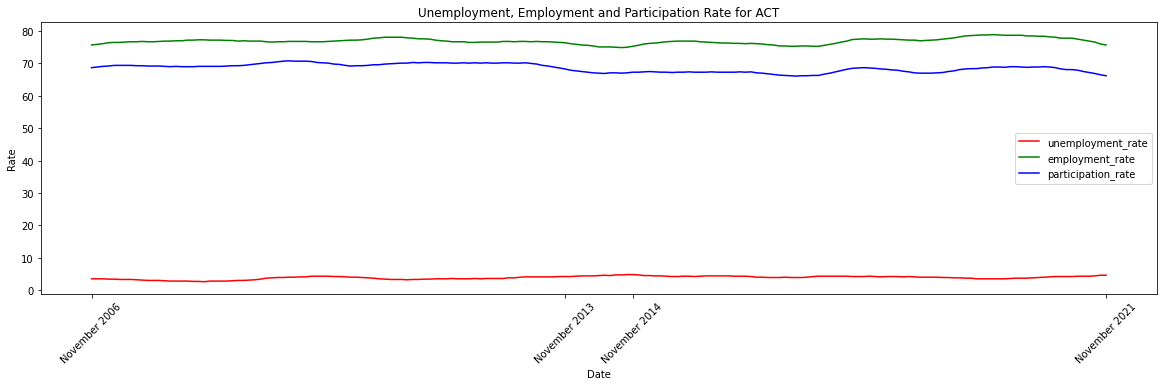

In [15]:
# Plotting the Date VS Rate for ACT
plt.figure(figsize=(20,5))
x_ticks = ['November 2006' ,'November 2013','November 2014','November 2021']
x_labels =['November 2006' ,'November 2013','November 2014','November 2021']
plt.title('Unemployment, Employment and Participation Rate for ACT')
plt.plot(data_act['date'],data_act['unemployment_rate'],'r',label='unemployment_rate',)
plt.plot(data_act['date'],data_act['employment_rate'],'g',label='employment_rate')
plt.plot(data_act['date'],data_act['participation_rate'],'b',label='participation_rate')
plt.xlabel('Date')
plt.ylabel('Rate')
leg = plt.legend();
plt.xticks(ticks=x_ticks, labels=x_labels,rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


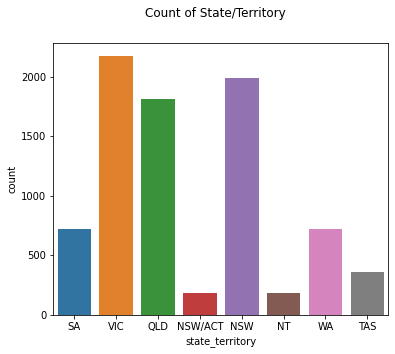

In [16]:
# Count of the State/Territory
fig = plt.figure(figsize=(6, 5))
fig.suptitle('Count of State/Territory')
sb.countplot(data.state_territory)

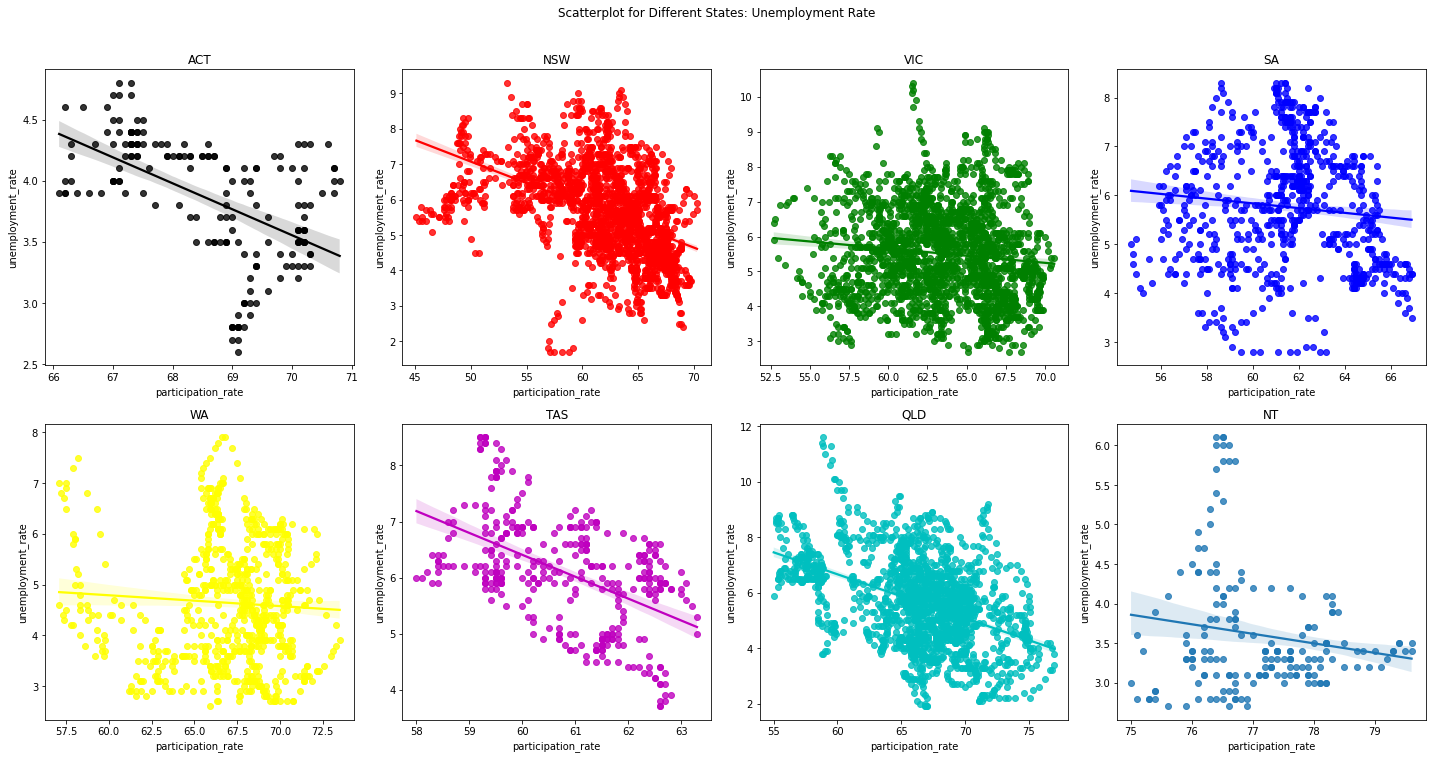

In [17]:
# Plotting for all the states for Unemployment Rates
fig, axes = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle('Scatterplot for Different States: Unemployment Rate',y=1.05)

sb.regplot(x=data_act.participation_rate, y=data_act.unemployment_rate, ax=axes[0,0], color='black').set_title('ACT')
sb.regplot(x=data_nsw.participation_rate, y=data_nsw.unemployment_rate, ax=axes[0,1], color='red').set_title('NSW')
sb.regplot(x=data_vic.participation_rate, y=data_vic.unemployment_rate, ax=axes[0,2], color='green').set_title('VIC')
sb.regplot(x=data_sa.participation_rate, y=data_sa.unemployment_rate, ax=axes[0,3], color='blue').set_title('SA')
sb.regplot(x=data_wa.participation_rate, y=data_wa.unemployment_rate, ax=axes[1,0], color='yellow').set_title('WA')
sb.regplot(x=data_tas.participation_rate, y=data_tas.unemployment_rate, ax=axes[1,1], color='m').set_title('TAS')
sb.regplot(x=data_qld.participation_rate, y=data_qld.unemployment_rate, ax=axes[1,2], color='c').set_title('QLD')
sb.regplot(x=data_nt.participation_rate, y=data_nt.unemployment_rate, ax=axes[1,3]).set_title('NT')

plt.tight_layout()

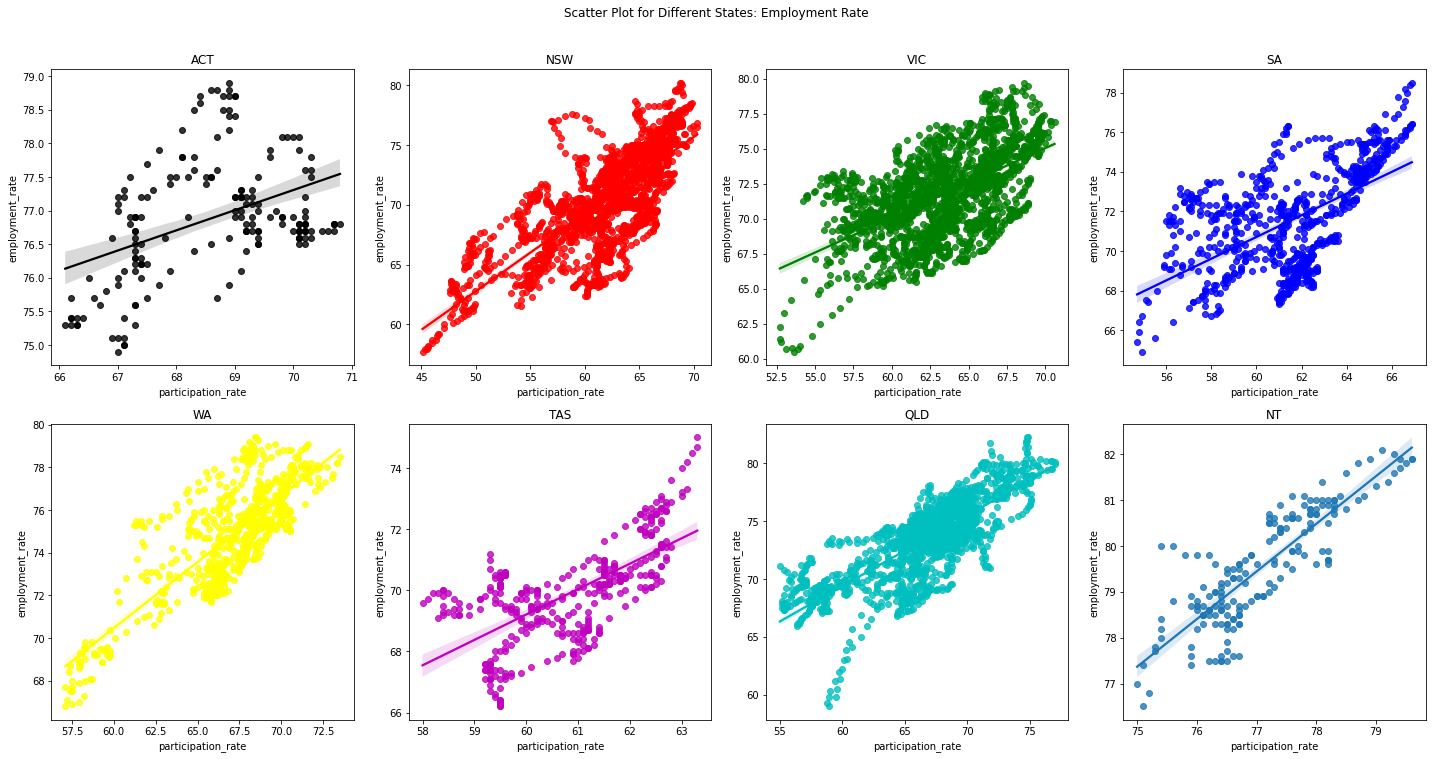

In [18]:
# Plotting for all the states for Employment Rates
fig, axes = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle('Scatter Plot for Different States: Employment Rate',y=1.05)

sb.regplot(x=data_act.participation_rate, y=data_act.employment_rate, ax=axes[0,0], color='black').set_title('ACT')
sb.regplot(x=data_nsw.participation_rate, y=data_nsw.employment_rate, ax=axes[0,1], color='red').set_title('NSW')
sb.regplot(x=data_vic.participation_rate, y=data_vic.employment_rate, ax=axes[0,2], color='green').set_title('VIC')
sb.regplot(x=data_sa.participation_rate, y=data_sa.employment_rate, ax=axes[0,3], color='blue').set_title('SA')
sb.regplot(x=data_wa.participation_rate, y=data_wa.employment_rate, ax=axes[1,0], color='yellow').set_title('WA')
sb.regplot(x=data_tas.participation_rate, y=data_tas.employment_rate, ax=axes[1,1], color='m').set_title('TAS')
sb.regplot(x=data_qld.participation_rate, y=data_qld.employment_rate, ax=axes[1,2], color='c').set_title('QLD')
sb.regplot(x=data_nt.participation_rate, y=data_nt.employment_rate, ax=axes[1,3]).set_title('NT')

plt.tight_layout()

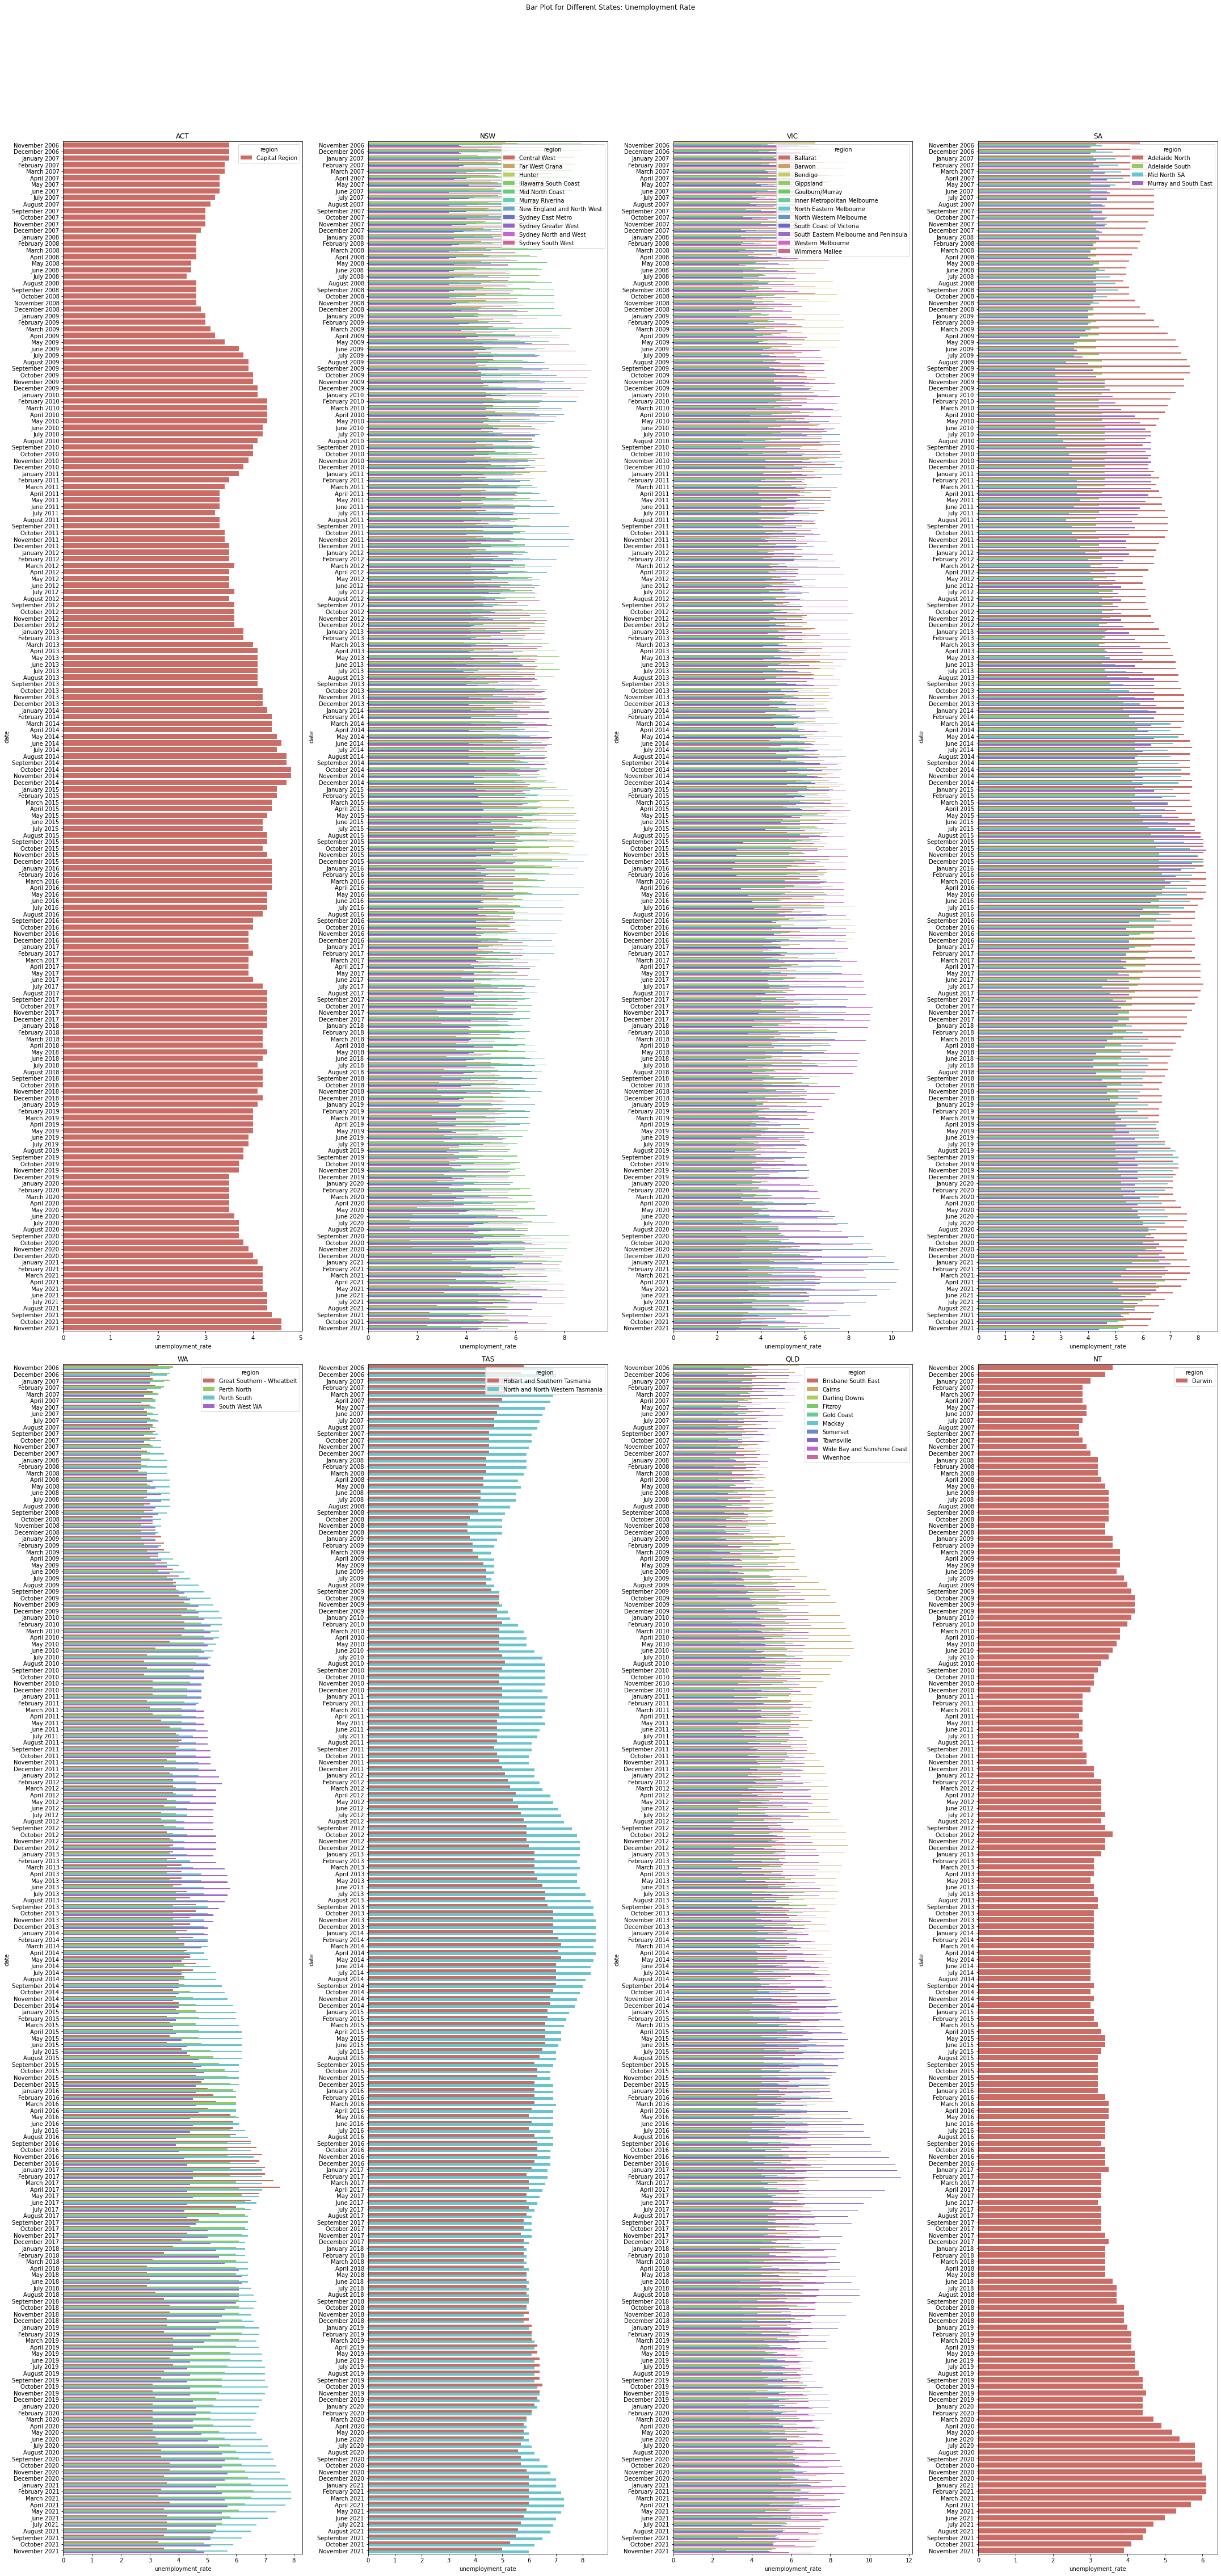

In [19]:
# Plotting for all the states for Unemployment Rates
fig, axes = plt.subplots(2, 4,figsize=(30,60))
fig.suptitle('Bar Plot for Different States: Unemployment Rate',y=1.05)

sb.barplot(x='unemployment_rate', y='date', hue='region', data=data_act, ax=axes[0,0], palette = 'hls').set_title('ACT')
sb.barplot(x='unemployment_rate', y='date', hue='region', data=data_nsw, ax=axes[0,1], palette = 'hls').set_title('NSW')
sb.barplot(x='unemployment_rate', y='date', hue='region', data=data_vic, ax=axes[0,2], palette = 'hls').set_title('VIC')
sb.barplot(x='unemployment_rate', y='date', hue='region', data=data_sa, ax=axes[0,3], palette = 'hls').set_title('SA')
sb.barplot(x='unemployment_rate', y='date', hue='region', data=data_wa, ax=axes[1,0], palette = 'hls').set_title('WA')
sb.barplot(x='unemployment_rate', y='date', hue='region', data=data_tas, ax=axes[1,1], palette = 'hls').set_title('TAS')
sb.barplot(x='unemployment_rate', y='date', hue='region', data=data_qld, ax=axes[1,2], palette = 'hls').set_title('QLD')
sb.barplot(x='unemployment_rate', y='date', hue='region', data=data_nt, ax=axes[1,3], palette = 'hls').set_title('NT')

plt.tight_layout()

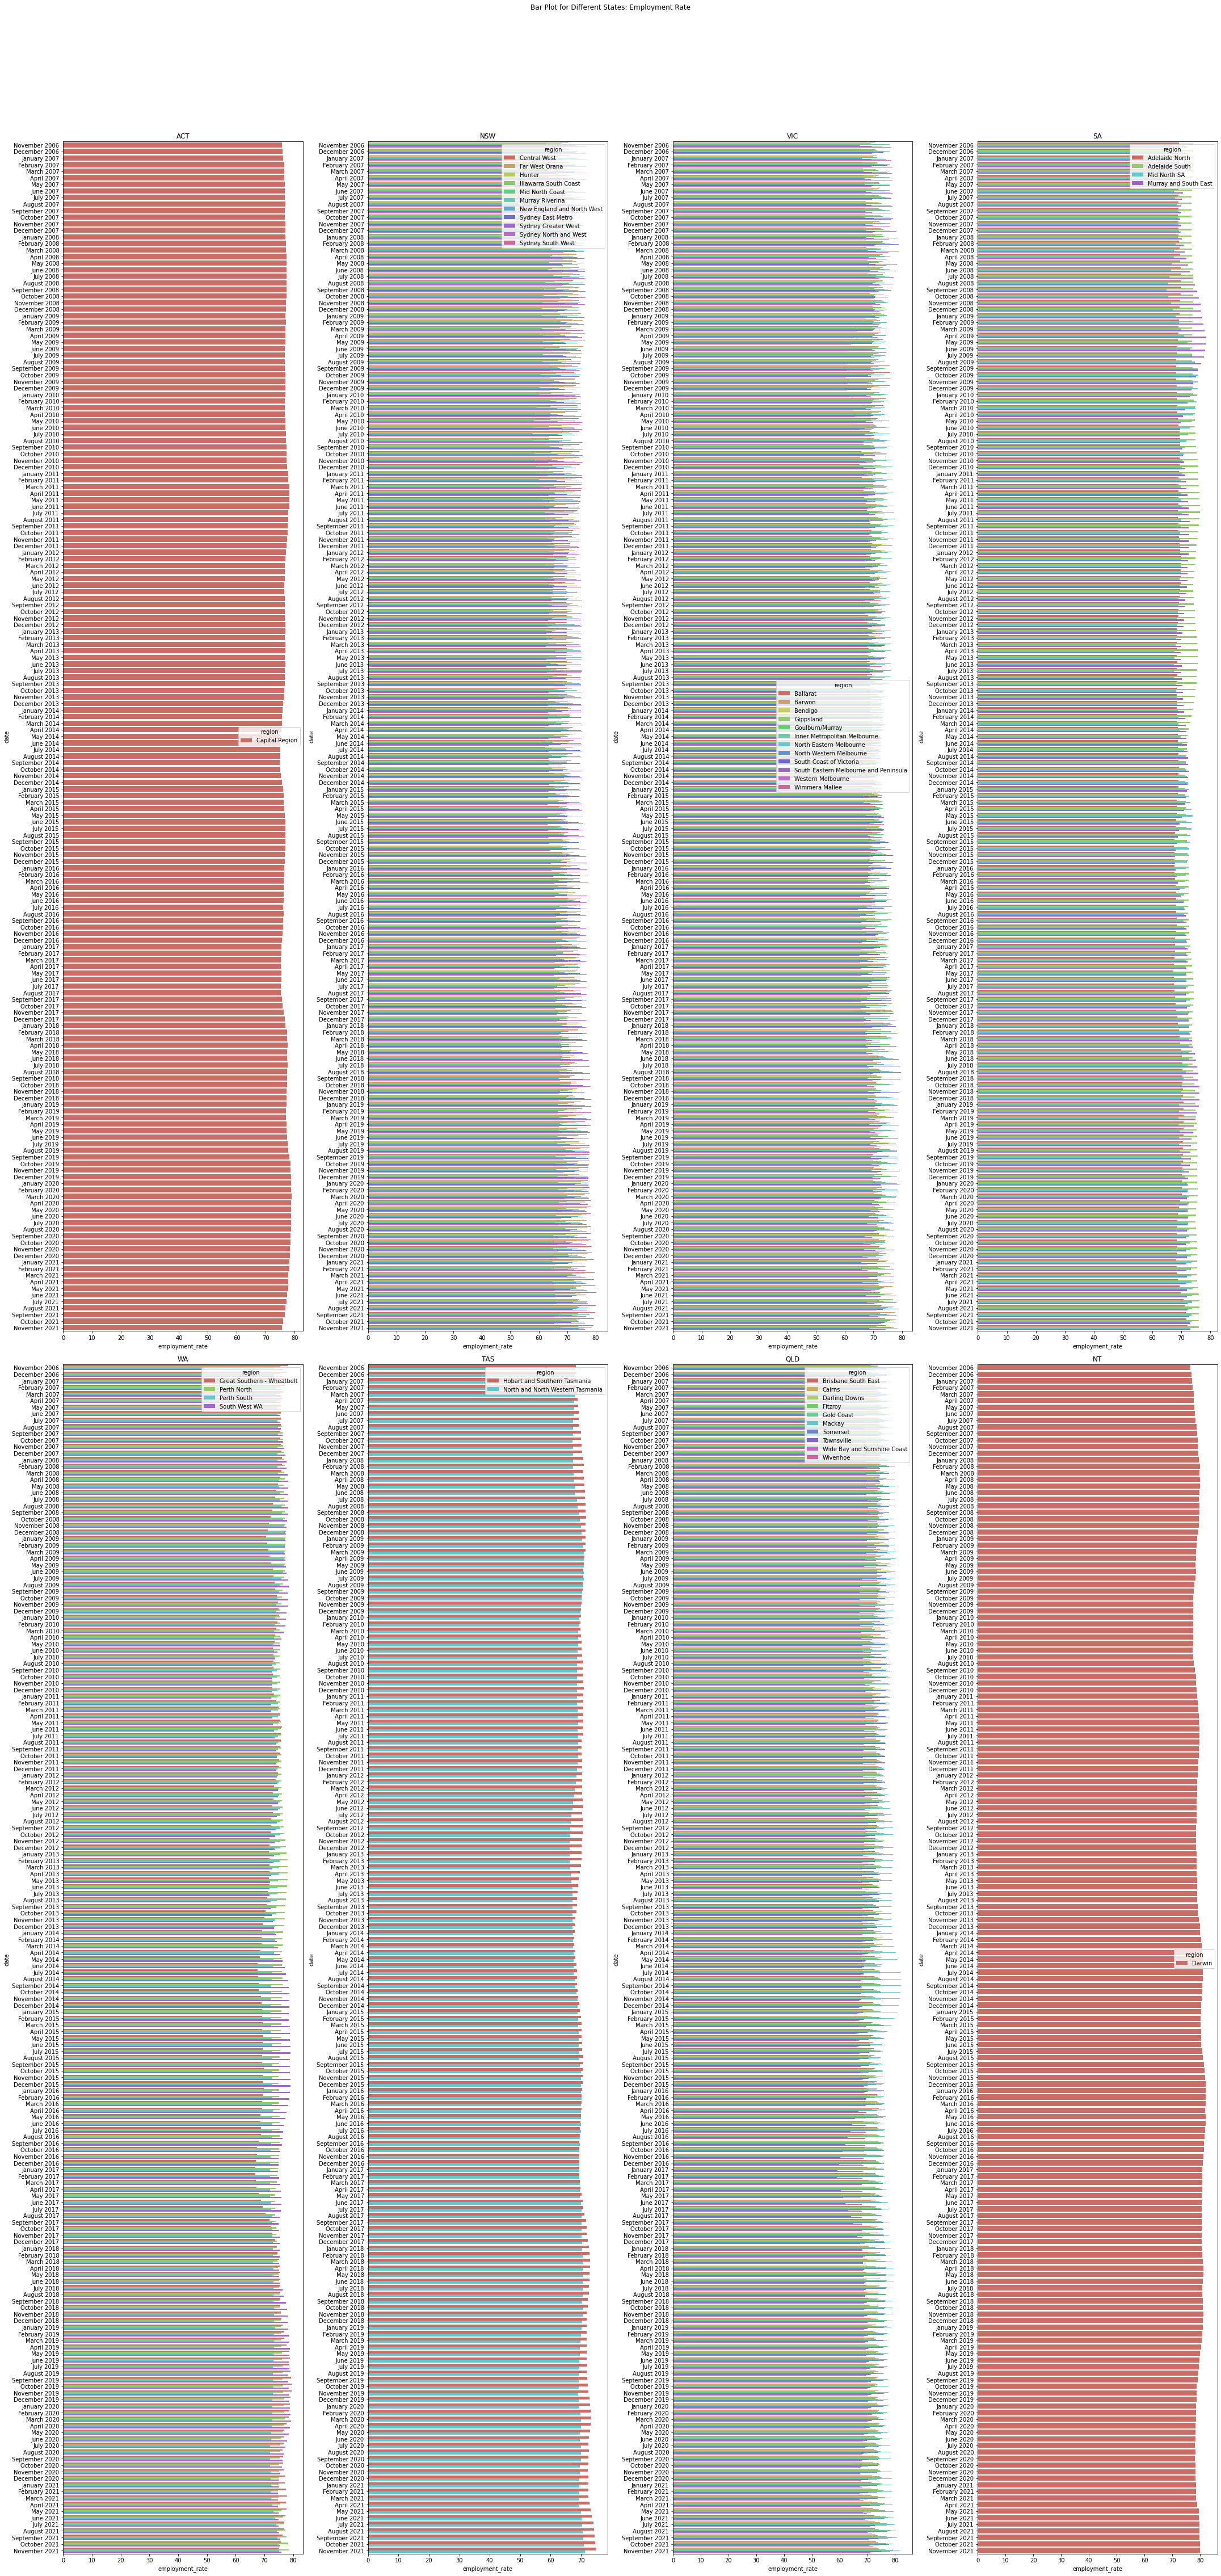

In [20]:
# Plotting for all the states for Employment Rates
fig, axes = plt.subplots(2, 4,figsize=(30,60))
fig.suptitle('Bar Plot for Different States: Employment Rate',y=1.05)

sb.barplot(x='employment_rate', y='date', hue='region', data=data_act, ax=axes[0,0],palette = 'hls').set_title('ACT')
sb.barplot(x='employment_rate', y='date', hue='region', data=data_nsw, ax=axes[0,1],palette = 'hls').set_title('NSW')
sb.barplot(x='employment_rate', y='date', hue='region', data=data_vic, ax=axes[0,2],palette = 'hls').set_title('VIC')
sb.barplot(x='employment_rate', y='date', hue='region', data=data_sa, ax=axes[0,3],palette = 'hls').set_title('SA')
sb.barplot(x='employment_rate', y='date', hue='region', data=data_wa, ax=axes[1,0],palette = 'hls').set_title('WA')
sb.barplot(x='employment_rate', y='date', hue='region', data=data_tas, ax=axes[1,1],palette = 'hls').set_title('TAS')
sb.barplot(x='employment_rate', y='date', hue='region', data=data_qld, ax=axes[1,2],palette = 'hls').set_title('QLD')
sb.barplot(x='employment_rate', y='date', hue='region', data=data_nt, ax=axes[1,3],palette = 'hls').set_title('NT')

plt.tight_layout()

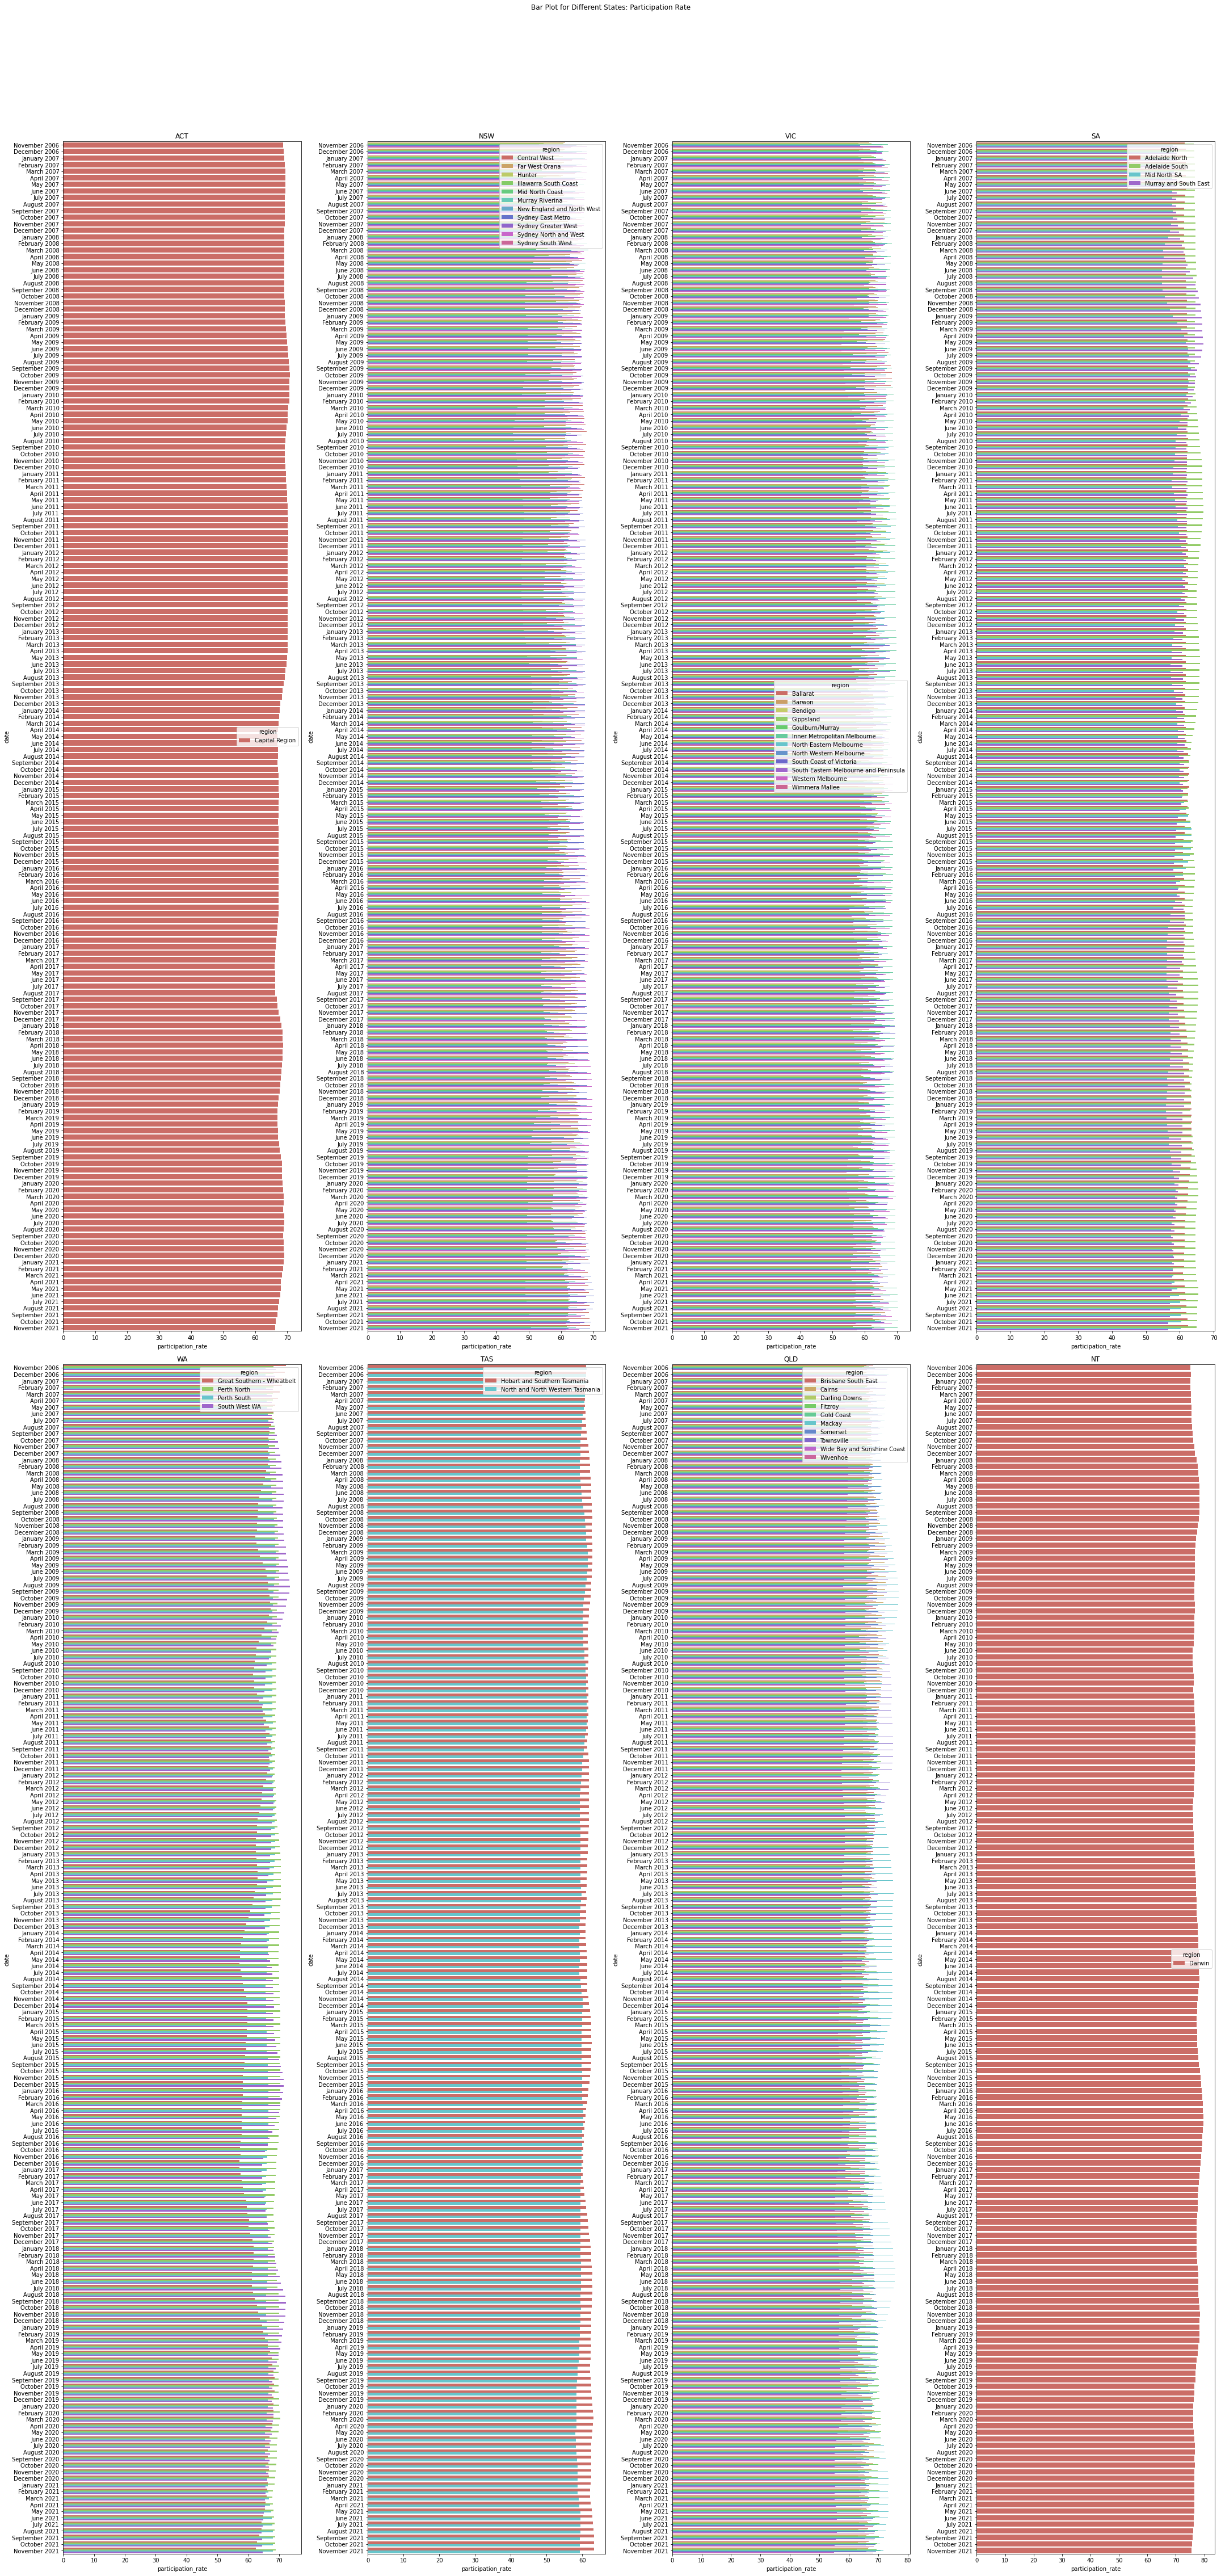

In [21]:
# Plotting for all the states for Participation Rate
fig, axes = plt.subplots(2, 4,figsize=(30,60))
fig.suptitle('Bar Plot for Different States: Participation Rate',y=1.05)

sb.barplot(x='participation_rate', y='date', hue='region', data=data_act, ax=axes[0,0], palette = 'hls').set_title('ACT')
sb.barplot(x='participation_rate', y='date', hue='region', data=data_nsw, ax=axes[0,1], palette = 'hls').set_title('NSW')
sb.barplot(x='participation_rate', y='date', hue='region', data=data_vic, ax=axes[0,2], palette = 'hls').set_title('VIC')
sb.barplot(x='participation_rate', y='date', hue='region', data=data_sa, ax=axes[0,3], palette = 'hls').set_title('SA')
sb.barplot(x='participation_rate', y='date', hue='region', data=data_wa, ax=axes[1,0], palette = 'hls').set_title('WA')
sb.barplot(x='participation_rate', y='date', hue='region', data=data_tas, ax=axes[1,1], palette = 'hls').set_title('TAS')
sb.barplot(x='participation_rate', y='date', hue='region', data=data_qld, ax=axes[1,2], palette = 'hls').set_title('QLD')
sb.barplot(x='participation_rate', y='date', hue='region', data=data_nt, ax=axes[1,3], palette = 'hls').set_title('NT')

plt.tight_layout()

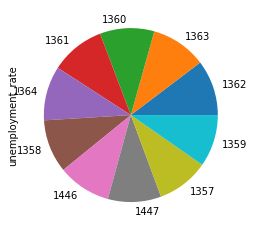

In [22]:
# PLotting a pie chart of the Unemployment Rate
data_act['unemployment_rate'].nlargest(n=10).plot(kind = 'pie')

In [23]:
# Importing the required libraries for Prediction
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [24]:
# Encoding the columns
for column in data_act.columns:    
  if data_act[column].dtype==np.number:
    continue
  data_act[column]=LabelEncoder().fit_transform(data_act[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
data_act.head(5)

,region,state_territory,date,unemployment_rate,participation_rate,employment_rate
1267,0,0,135,3.5,68.7,75.7
1268,0,0,30,3.5,68.9,75.9
1269,0,0,60,3.5,69.1,76.1
1270,0,0,45,3.4,69.2,76.4
1271,0,0,105,3.4,69.4,76.5


In [26]:
# Splitting the data for prediction
x = data_act[['region','date']]
y = data_act[['unemployment_rate','participation_rate','employment_rate']]

In [27]:
# Splitting the data into training and test data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)

In [28]:
xtest.head(5) 

,region,date
1384,0,24
1360,0,22
1380,0,9
1429,0,133
1302,0,153


In [29]:
ytest.head(5)

,unemployment_rate,participation_rate,employment_rate
1384,4.2,67.4,76.2
1360,4.7,67.1,75.0
1380,4.4,67.3,76.3
1429,3.5,68.8,78.7
1302,4.0,70.8,76.8


In [30]:
# Creating the model using K Nearest Neighbour, Decision Tree Regressor, Random Forest Regressor and Linear Regression
model_knn = KNeighborsRegressor(n_neighbors=3)
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_lr = LinearRegression()   

In [ ]:
# Fitting the model against the data
model_knn.fit(xtrain, ytrain)
model_dt.fit(xtrain, ytrain)
model_rf.fit(xtrain, ytrain)
model_lr.fit(xtrain, ytrain)

In [32]:
# Model Prediction using KNN
model_knn.predict(xtest.head(5))

array([[ 4.26666667, 67.26666667, 76.56666667],
       [ 4.23333333, 67.6       , 76.3       ],
       [ 4.33333333, 67.7       , 76.5       ],
       [ 4.        , 68.46666667, 77.        ],
       [ 3.4       , 69.56666667, 77.33333333]])

In [33]:
# Model Prediction using Decision Tree
model_dt.predict(xtest.head(5))

array([[ 4.3, 67.3, 76.9],
       [ 4.1, 69.2, 76.7],
       [ 4.4, 67.3, 76.5],
       [ 4.2, 68.1, 77.8],
       [ 2.8, 69.1, 77.2]])

In [34]:
# Model Prediction using Random Forest Tree
model_rf.predict(xtest.head(5))

array([[ 4.269, 67.28 , 76.667],
       [ 4.088, 68.764, 76.796],
       [ 4.368, 67.462, 76.416],
       [ 4.139, 68.238, 77.455],
       [ 3.2  , 69.09 , 77.15 ]])

In [36]:
# Model Prediction using Linear Regression
model_lr.predict(xtest.head(5))

array([[ 3.82199303, 68.74907188, 76.9632367 ],
       [ 3.82069641, 68.75479416, 76.96609211],
       [ 3.8122684 , 68.79198893, 76.98465227],
       [ 3.89265872, 68.437208  , 76.80761691],
       [ 3.9056249 , 68.37998527, 76.77906282]])

In [37]:
# Prediction score for KNN
model_knn.score(xtest, ytest) 

0.26573661048057345

In [38]:
# Prediction score for Decision Tree
model_dt.score(xtest, ytest)  

-0.06874485927182934

In [39]:
# Prediction score for Random Forest
model_rf.score(xtest, ytest) 

0.20758843463236157

In [40]:
# Prediction score for Linear Regression
model_lr.score(xtest, ytest)  

-0.03142445620223644

In [41]:
# Creating the new split with only Unemployment Rate as the the output and splitting for training and test data
x1 = data_act[['region','date','employment_rate','participation_rate']]
y1 = data_act['unemployment_rate']
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1,y1,test_size=0.20,random_state=1)

In [42]:
# Creating the model using K Nearest Neighbour, Decision Tree Regressor, Random Forest Regressor and Linear Regression
model_knn1 = KNeighborsRegressor(n_neighbors=3)
model_dt1 = DecisionTreeRegressor() 
model_rf1 = RandomForestRegressor()
model_lr1 = LinearRegression()

In [ ]:
# Fitting the model against the data
model_knn1.fit(xtrain1, ytrain1)
model_dt1.fit(xtrain1, ytrain1)
model_rf1.fit(xtrain1, ytrain1)
model_lr1.fit(xtrain1, ytrain1)

In [44]:
# Model Prediction using  KNN
model_knn1.predict(xtest1.head(5))

array([4.26666667, 4.23333333, 4.33333333, 3.83333333, 3.4       ])

In [46]:
# Model Prediction using Decision Tree
model_dt1.predict(xtest1.head(5))

array([4.5, 4.5, 4.4, 3.6, 4. ])

In [47]:
# Model Prediction using Random Forest
model_rf1.predict(xtest1.head(5))

array([4.359, 4.523, 4.395, 3.647, 3.976])

In [48]:
# Model Prediction using Linear Regression
model_lr1.predict(xtest1.head(5))

array([4.12162995, 4.27799332, 4.12975255, 3.66504337, 3.48562219])

In [50]:
# Prediction score for KNN
model_knn1.score(xtest1,ytest1)

0.23552702882324672

In [51]:
# Prediction score for Decision Tree
model_dt1.score(xtest1,ytest1) 

0.7403837305604123

In [52]:
# Prediction score for Random Forest
model_rf1.score(xtest1,ytest1)

0.7830865211189838

In [53]:
# Prediction score for Linear Regression
model_lr1.score(xtest1,ytest1)

0.37832126630205654

In [54]:
# Testing the model against a sample data
input_value = ['Capital Region', 'August 2022', 80, 70,]

In [55]:
# Creating the dataframe
input_value = pd.DataFrame(data=[input_value], columns =['region', 'date', 'employment_rate', 'participation_rate'])

In [56]:
input_value

,region,date,employment_rate,participation_rate
0,Capital Region,August 2022,80,70


In [ ]:
# Encoding the columns
for column in input_value.columns:               
  if input_value[column].dtype==np.number:
    continue
  input_value[column]=LabelEncoder().fit_transform(input_value[column])

In [58]:
# Predicting using Random Forest Regressor
model_rf1.predict(input_value)

array([4.365])